In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('Obesity Classification.csv')
data

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [24]:
data['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [25]:
print(data['Label'].value_counts())

Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64


In [26]:
data.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [27]:
data.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

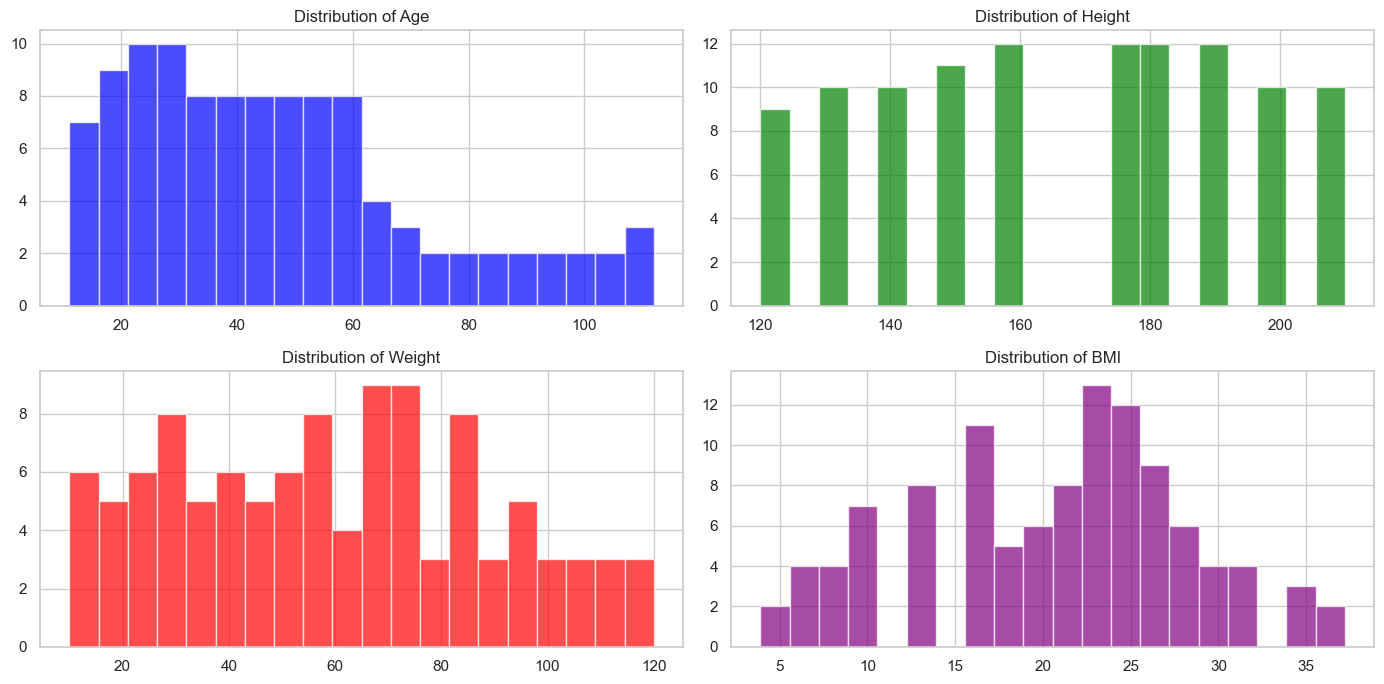

In [28]:
import matplotlib.pyplot as plt

# Manually plot histograms for each numerical attribute to avoid any seaborn or pandas complexities
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.hist(data['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
plt.hist(data['Height'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Height')

plt.subplot(2, 2, 3)
plt.hist(data['Weight'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Weight')

plt.subplot(2, 2, 4)
plt.hist(data['BMI'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of BMI')

plt.tight_layout()
plt.show()


In [29]:
# Assuming 'data' is your DataFrame

# Group by 'Label' and calculate the min and max BMI for each category
bmi_ranges = data.groupby('Label')['BMI'].agg(['min', 'max'])
print(bmi_ranges)



                min   max
Label                    
Normal Weight  21.2  25.3
Obese          28.9  37.2
Overweight     25.0  29.1
Underweight     3.9  20.0


In [30]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encoding the 'Gender' column
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# Standardizing the data
scaler = StandardScaler()
features = ['Age', 'Height', 'Weight', 'BMI']  # numerical features
data[features] = scaler.fit_transform(data[features])

# Split the data into training and testing sets
X = data[['Age', 'Gender', 'Height', 'Weight', 'BMI']]  # assuming these are the predictors
y = data['Label']  # assuming 'Label' is the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
data

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,-0.876032,1,0.303700,0.714053,0.629376,Normal Weight
1,2,-0.672829,0,-0.236952,0.017730,0.258448,Normal Weight
2,3,-0.469625,1,0.483917,1.062214,0.894325,Overweight
3,4,-0.266422,0,-0.597387,-0.330431,-0.072738,Underweight
4,5,-0.063219,1,0.844352,1.410375,1.410975,Obese
...,...,...,...,...,...,...,...
103,106,-1.445001,1,0.303700,-1.723076,-2.205577,Underweight
104,107,-1.241798,0,-0.236952,-1.723076,-2.205577,Underweight
105,108,-1.038594,1,0.483917,-1.548995,-1.980370,Underweight
106,109,-0.835391,0,-0.597387,-1.548995,-1.980370,Underweight


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       1.00      0.75      0.86         4
   Overweight       0.80      1.00      0.89         4
  Underweight       1.00      1.00      1.00         8

     accuracy                           0.95        22
    macro avg       0.95      0.94      0.94        22
 weighted avg       0.96      0.95      0.95        22

Confusion Matrix:
 [[6 0 0 0]
 [0 3 1 0]
 [0 0 4 0]
 [0 0 0 8]]


In [33]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 100, 'penalty': 'l1'}
Best cross-validation score: 0.92


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Adjust the Logistic Regression model to use the liblinear solver
model = LogisticRegression(C=100, penalty='l1', solver='liblinear')

# Fit the model on the training data
model.fit(X_train, y_train)

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Average cross-validation score: 0.92
